# Clustering

Clustering is an unsupervised learning technique useful to find similarity amongst data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load and plot data

In [2]:
df = pd.read_csv('../data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
import seaborn as sns

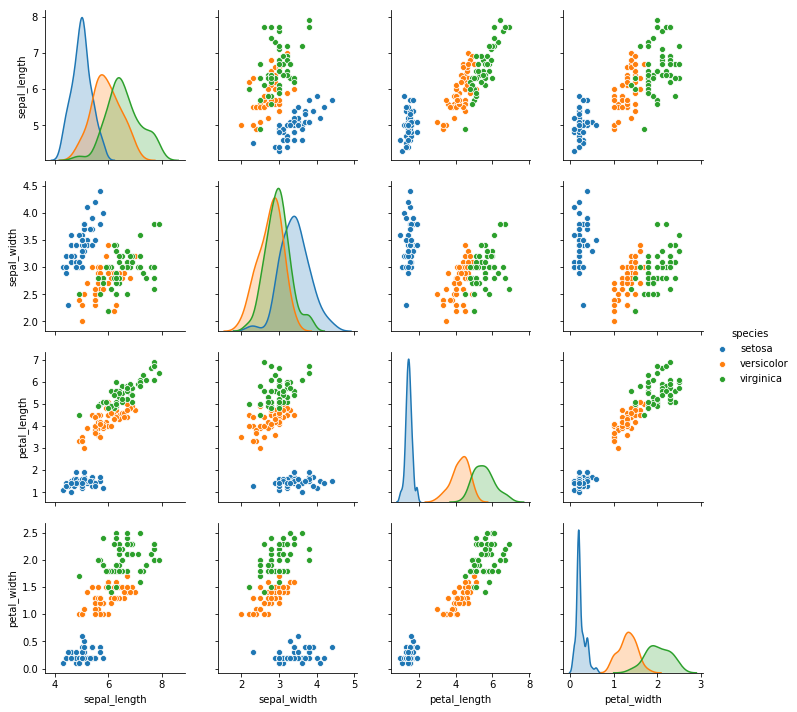

In [5]:
sns.pairplot(df, hue='species');

## Encode labels

In [6]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df['target_n'] = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

## Kmeans clustering

In [8]:
from sklearn.cluster import KMeans

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
km = KMeans(3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
centers = km.cluster_centers_
centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

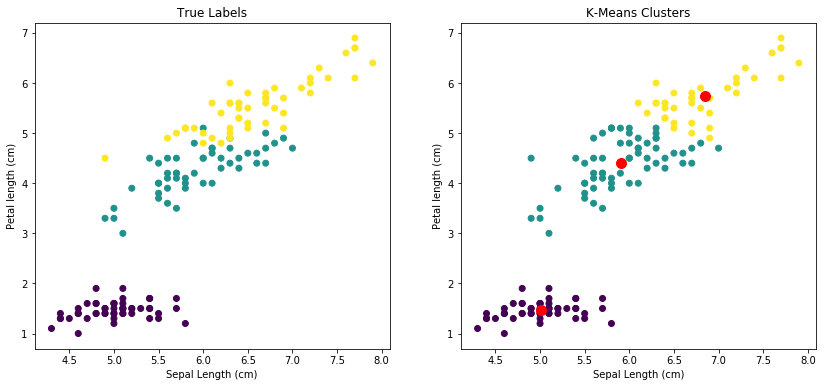

In [10]:
plt.figure(figsize = (14,6))
plt.subplot(121)
plt.scatter(df.sepal_length, df.petal_length, c=df['target_n'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('True Labels')

plt.subplot(122)
plt.scatter(df.sepal_length, df.petal_length, c=km.labels_)
plt.scatter(centers[:,0], centers[:,2], marker='o', c='r', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('K-Means Clusters')
plt.draw()
plt.show()


### Exercise 1
- discuss with your pair:
    - why do cluster centers have 4 coordinates?
    - do the colors in the two plots coincide? Why?
- change the number of clusters using the n_clusters parameter. What happens?
- change the initialization parameters of KMeans to 'random'. What happens?
- run the clustering multiple times, do the centroid positions change?

### Exercise 2
- calculate silhouette_score for different values of k. You will have to extract the labels from km at different values of k
- plot the silhouette score as a function of k for k between 2 and 10
- discuss with your pair:
    - what value of k gives the highest silhouette score?
    - did you expect that result?

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
for k in range(2, 10):
    km = KMeans(k)
    km.fit(X)
    s = silhouette_score(X, km.labels_)
    print("k: %d; score: %f" % (k, s))

k: 2; score: 0.681046
k: 3; score: 0.552819
k: 4; score: 0.498051
k: 5; score: 0.488749
k: 6; score: 0.367846
k: 7; score: 0.346246
k: 8; score: 0.357454
k: 9; score: 0.318934


### Exercise 3

Try clustering with another method of the ones you find here: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html


In [13]:
import sklearn

In [14]:
# use auto-complete: sklearn.metrics.silhouette_samples

In [15]:
from sklearn.cluster import DBSCAN

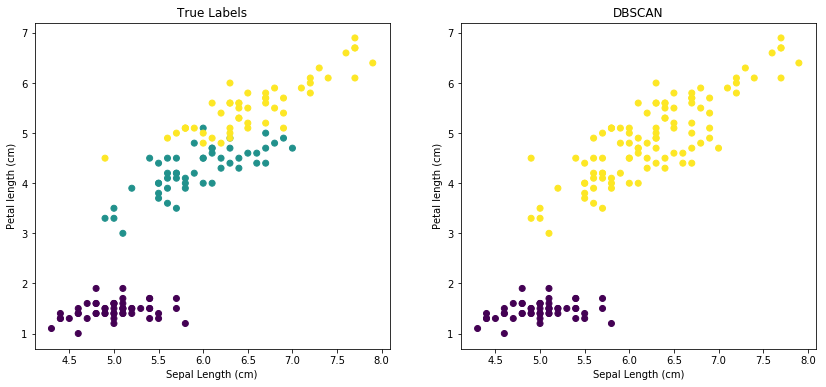

In [16]:
db = DBSCAN(eps=0.9)
db.fit(X)

plt.figure(figsize = (14,6))
plt.subplot(121)
plt.scatter(df.sepal_length, df.petal_length, c=df['target_n'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('True Labels')

plt.subplot(122)
plt.scatter(df.sepal_length, df.petal_length, c=db.labels_)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('DBSCAN')
plt.draw()
plt.show()



### Exercise 4

In the data folder you can find two more datasets ready for clustering:

- `../data/Wholesale customers data.csv`
- `../data/Absenteeism_at_work.csv`


Choose one and repeat the following steps:

1. Load the dataset
- Inspect it with `.read()` and `.info()`
- decide which features you are going to use for clustering (hint: categorical features are tricky, you may want to ignore them for now)
- rescale the features
- train K-Means and find the optimal value of K using the silhouette coefficient
- does the dataset cluster well?
- train DBSSCAN and check the number of clusters found
- inspect a couple of clusters and see if you can describe the members

In [19]:
df = pd.read_csv('../data/Wholesale customers data.csv')

In [23]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [17]:
pd.Series(dbscan.labels_).value_counts().head(20)

NameError: name 'dbscan' is not defined